1.Introduction 

In the metalworking sector, a gravity drop hammer is a forging processing device. This device is used to shape metal components using a powerful falling motion.

The basic mechanism of a gravity drop hammer is a heavy object falling freely from a great height. This falling motion is converted into a high-energy impact on the metal portion, which shapes it. A lever system is used to create the falling movement, and the weight can be raised for strikes with great energy.

These hammers are employed in the manufacture of big and intricately shaped metal components. They are perfect for a variety of uses, including the molding of metal sheets, bars, or tubes, the creation of components needing specialized machining.


![Açıklama](Safety03.gif)


2. Calculations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = data = pd.read_excel('Gravity-Drop-hammer-kopia.xlsx')

In [5]:
df.head(3)

,Time [ms],Force [kN]
0,0.00,-0.059359
1,0.01,-0.074187
2,0.02,-0.049988


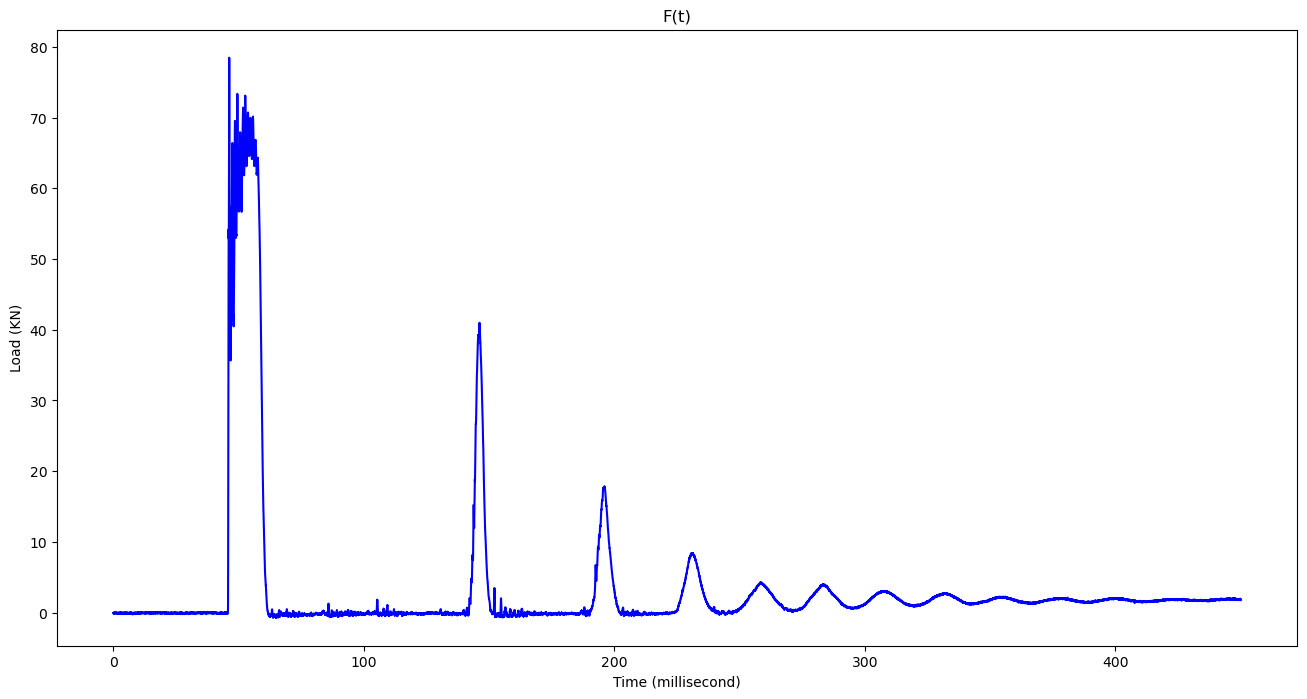

In [6]:
plt.figure(figsize=(16, 8))
plt.plot(data["Time [ms]"], data["Force [kN]"], color="blue")
plt.xlabel("Time (millisecond)")
plt.ylabel("Load (KN)")
plt.title("F(t)")
plt.show()

In [11]:
# Boundry Points are between 53 and 63 miliseconds
df = df[(df["Time [ms]"] >= 58) &  (df["Time [ms]"] < 62)]


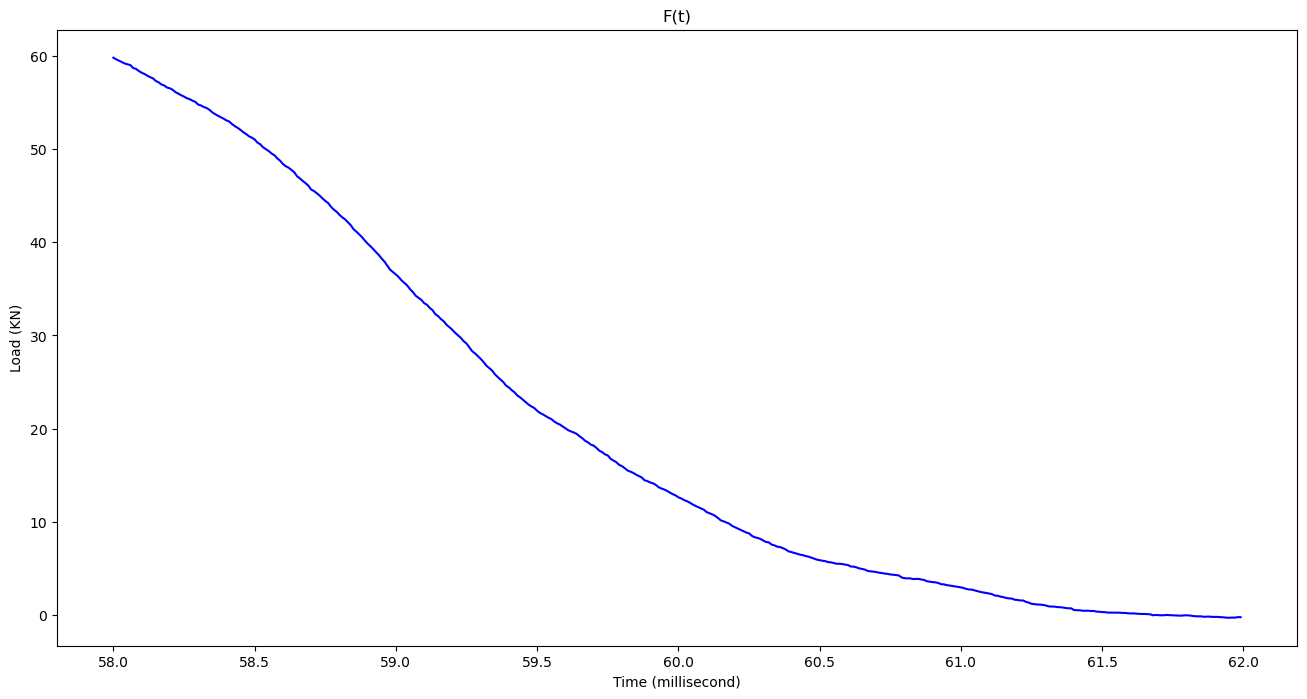

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(df["Time [ms]"], df["Force [kN]"], color="blue")
plt.xlabel("Time (millisecond)")
plt.ylabel("Load (KN)")
plt.title("F(t)")
plt.show()

In [13]:
df["Acceleration"] = df["Force [kN]"]/80.5 # m = 80.5 kg

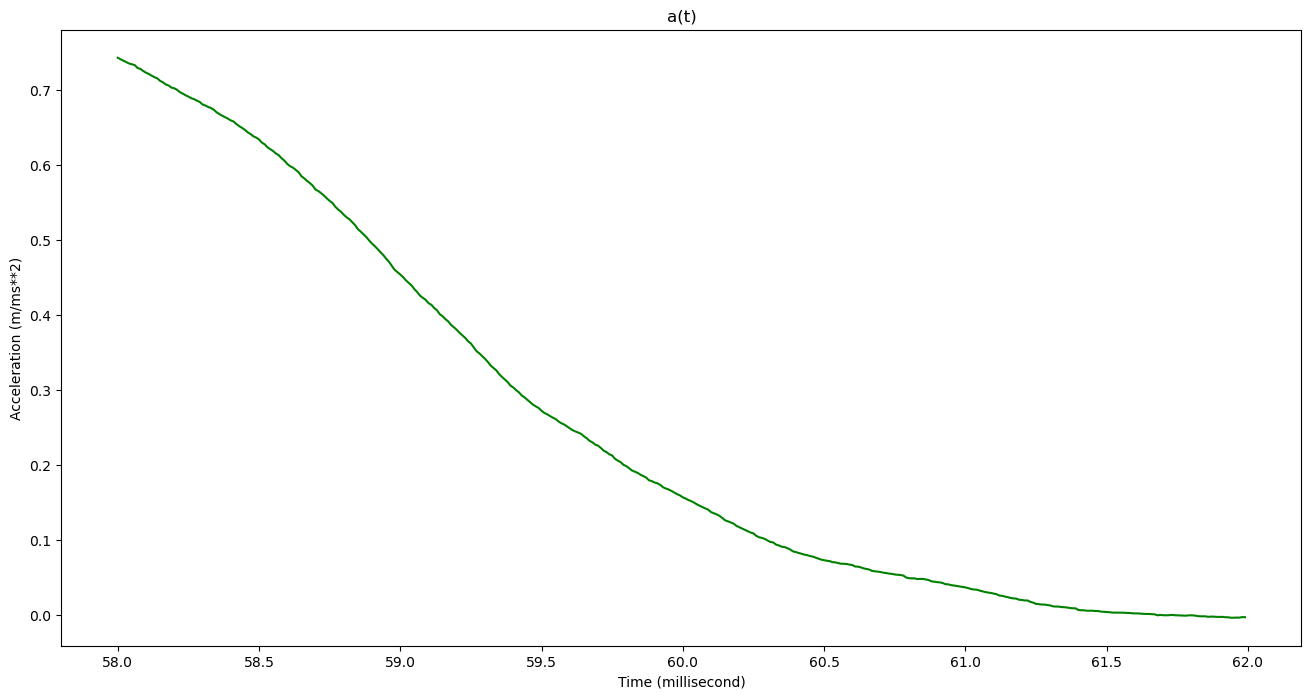

In [15]:
plt.figure(figsize=(16, 8))
plt.plot(df["Time [ms]"], df["Acceleration"], color="green")
plt.xlabel("Time (millisecond)")
plt.ylabel("Acceleration (m/ms**2)")
plt.title("a(t)")
plt.show()

In [16]:
velocity = df["Acceleration"] * df["Time [ms]"].diff()
sum_velocities = velocity.cumsum()
# Integral of acceleration

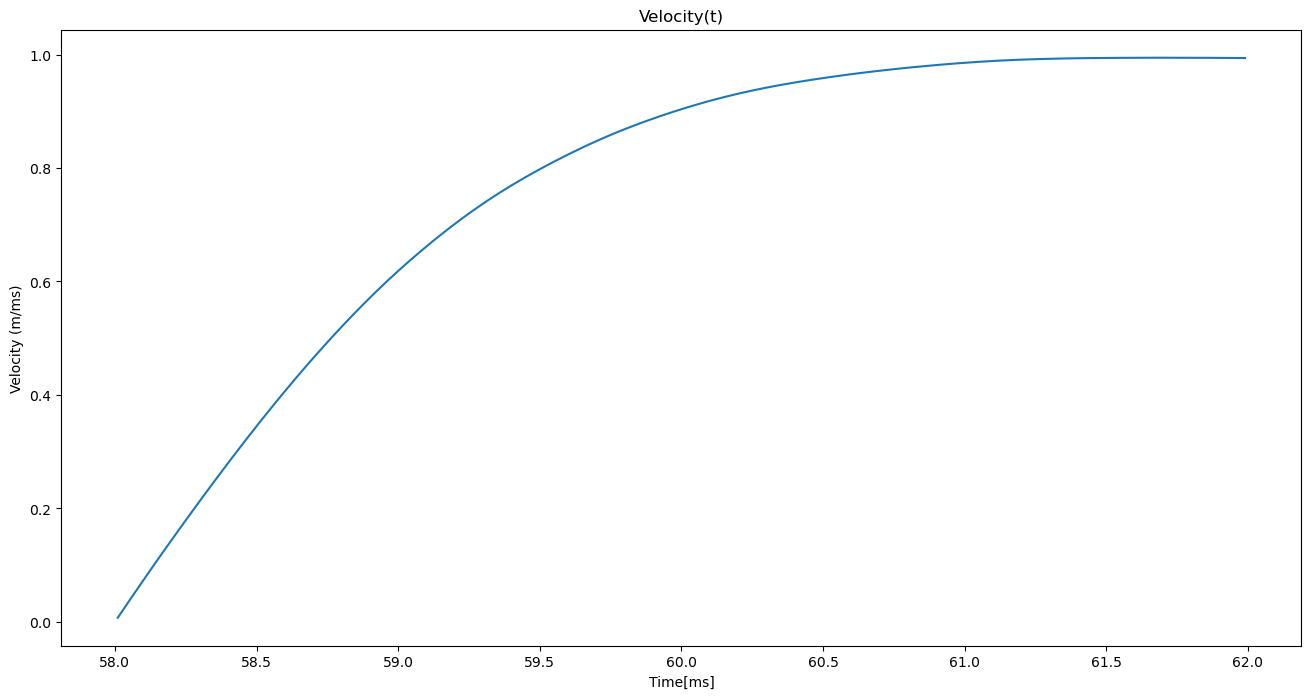

In [20]:
plt.figure(figsize=(16, 8))
plt.plot(df["Time [ms]"],sum_velocities)
plt.xlabel("Time[ms]")
plt.ylabel('Velocity (m/ms)')
plt.title("Velocity(t)")
plt.show()

In [24]:
displacement = sum_velocities * df["Time [ms]"].diff()
sum_displacements = displacement.cumsum()
# Integral of velocity

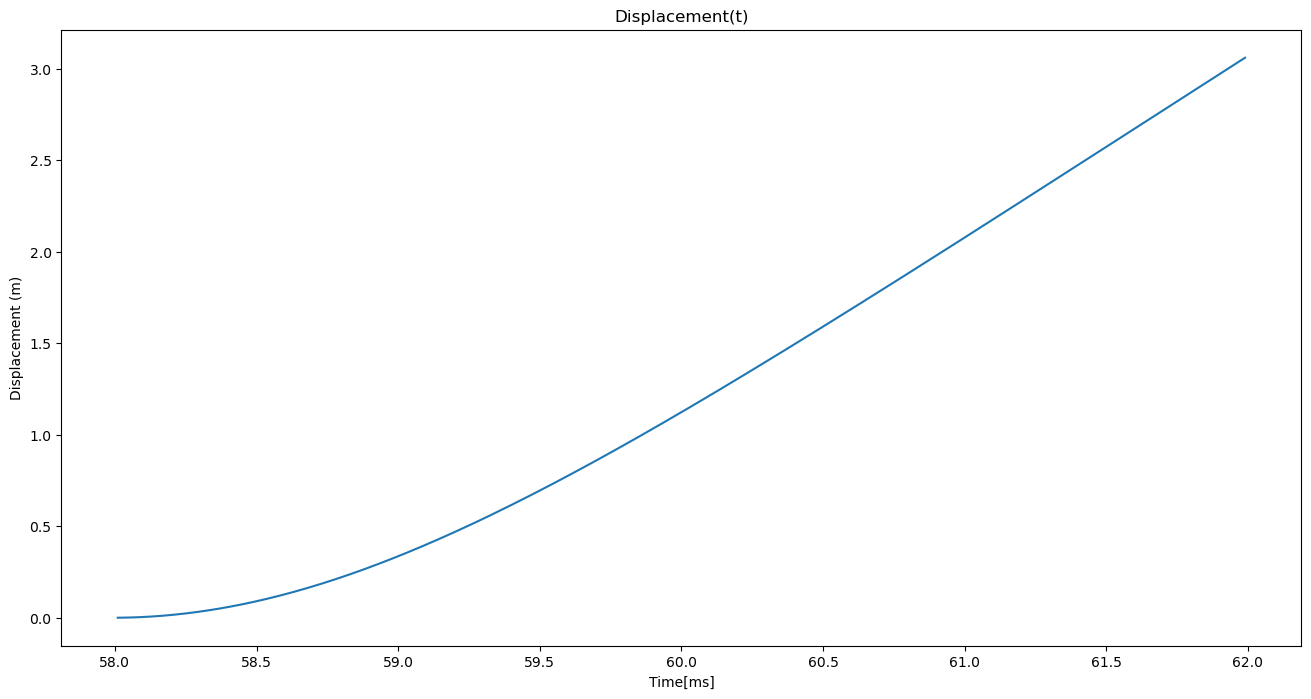

In [25]:
plt.figure(figsize=(16, 8))
plt.plot(df["Time [ms]"], sum_displacements)
plt.xlabel("Time[ms]")
plt.ylabel('Displacement (m)')
plt.title("Displacement(t)")
plt.show()

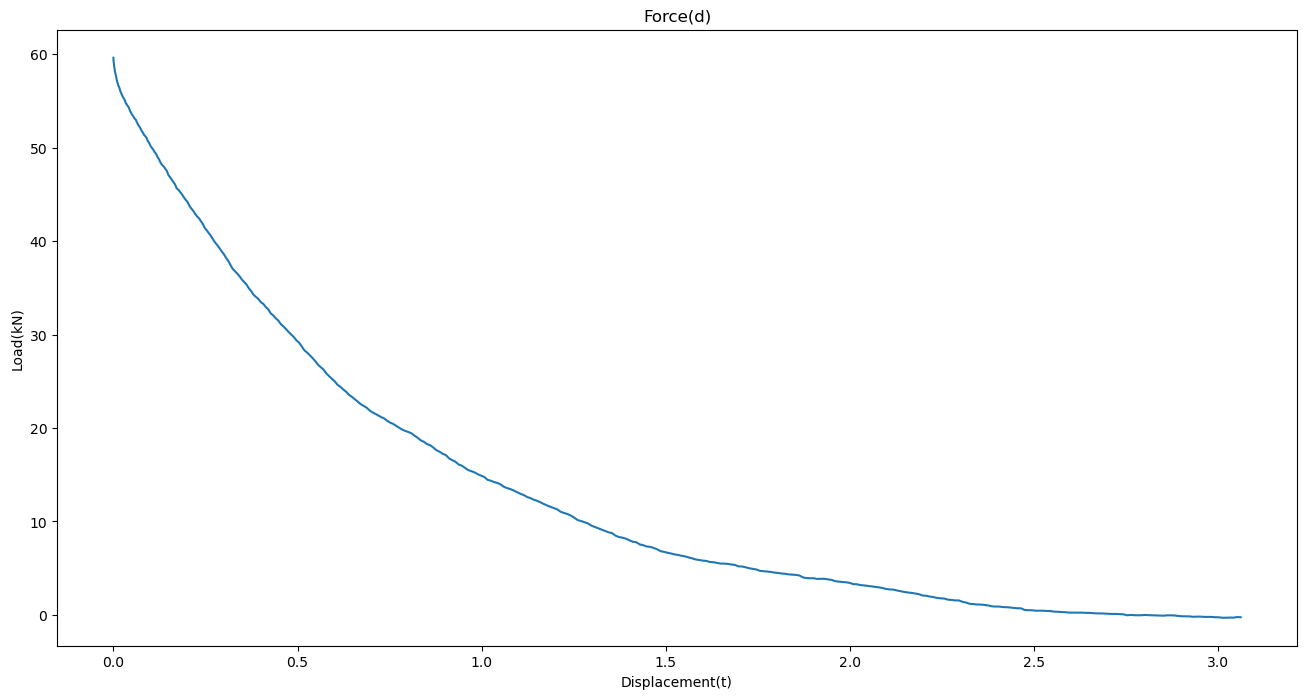

In [27]:
plt.figure(figsize=(16, 8))
plt.plot(sum_displacements, df["Force [kN]"])
plt.xlabel("Displacement(t)")
plt.ylabel('Load(kN)')
plt.title("Force(d)")
plt.show()

In [30]:
#For integrate Force and Displacement Graph
absorbtion = df["Force [kN]"] * sum_displacements.diff()
sum_absorbtions = absorbtion.cumsum()

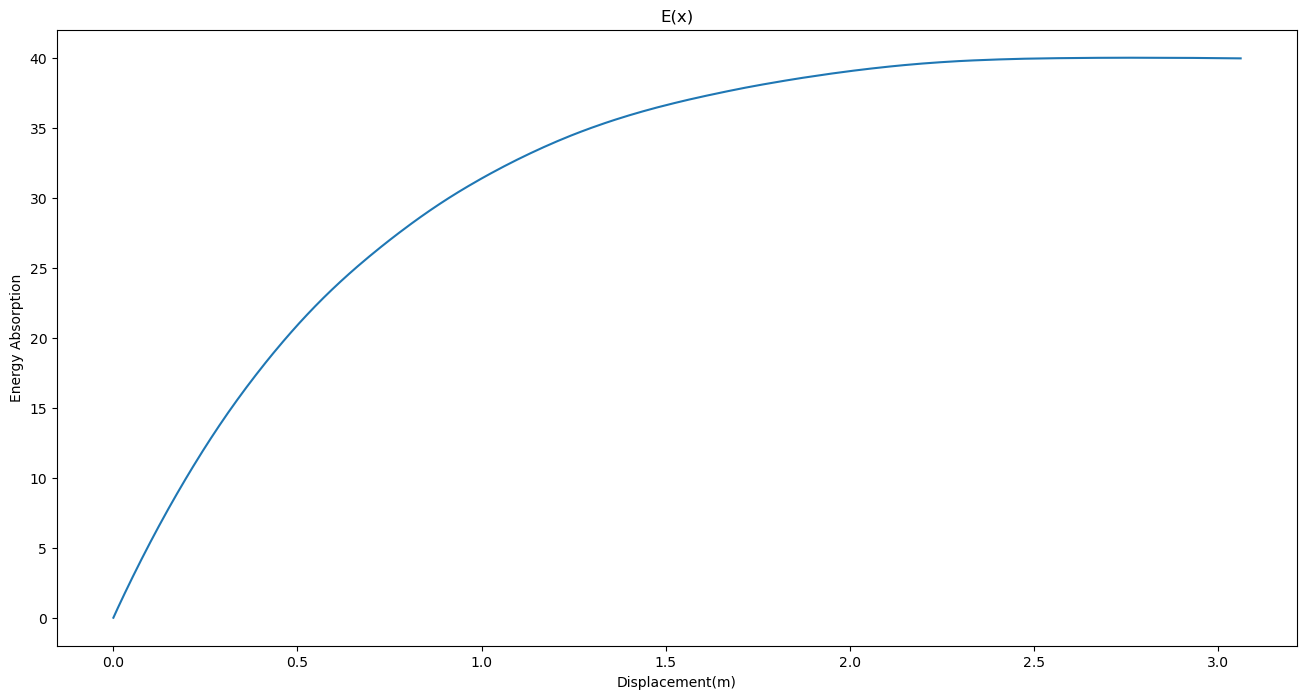

In [31]:
#For Calculation Energy Absorbation , Energy Absorbation is Under the area Force and Displacement Graph
plt.figure(figsize=(16, 8))
plt.plot(sum_displacements, sum_absorbtions)
plt.xlabel("Displacement(m)")
plt.ylabel('Energy Absorption')
plt.title("E(x)")
plt.show()

In [32]:
# Value of Energy Absorbtion

sum_absorbtions[np.isnan(sum_absorbtions)] = 0
sum_displacements[np.isnan(sum_displacements)] = 0

energy_absorbtion = np.trapz(sum_absorbtions, sum_displacements)
print(f"Value of energy absorpiton is {energy_absorbtion/100} kj")

Value of energy absorpiton is 0.9751502624475604 kj


3.Conclusions

In this experiment we tried to understand the importance of energy absorption. From the potential energy formula (mgh):

The initial kinetic energy in the horizontal impactor: 19 J

Absorbed Enegy = 0.97 J

% Absorbed Energy = % 20 

Due to 2nd Law of Thermodynamics we cannot absorb all of the energy , deducing from our calculations, we can understand that % 80 of energy turned into heat.